In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# clustering method
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [6]:
df = pd.read_csv('/content/Country-data.csv')

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


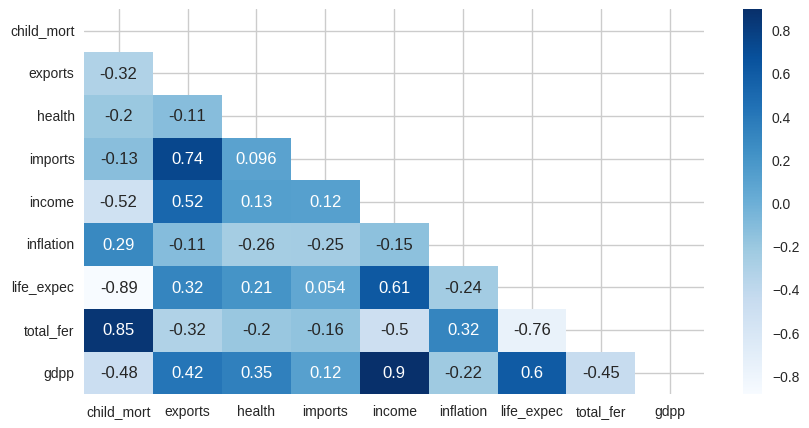

In [52]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.drop(columns=['country'], axis=1).corr(), annot=True, cmap='Blues', mask=np.triu(np.ones_like(df.drop(columns=['country'], axis=1).corr())))
plt.show()

Haciendo un rápido analisis para ver cuales variables tienen relaciones lineales entre si.

In [15]:
####### Helper function for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
    plt.show()

In [45]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos.

<ipython-input-15-f8af3aea40f4>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')


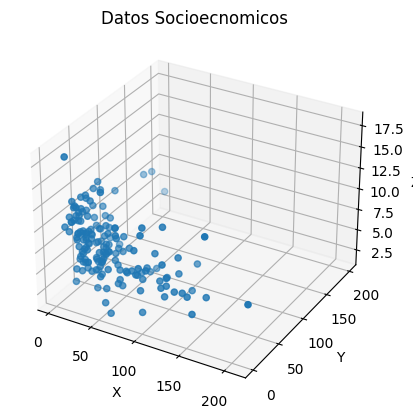

----- K-means -----
Labels:  [0 5 5 0 2 2 0 1 1 5 4 9 0 2 5 1 5 0 0 0 5 5 2 6 5 0 0 0 0 1 0 0 0 2 5 5 0
 0 0 5 0 2 4 4 1 5 5 5 0 9 0 2 0 1 1 5 0 0 1 0 4 5 0 0 0 0 0 2 1 0 5 5 5 1
 4 4 5 1 5 2 0 0 6 0 0 2 2 0 0 2 2 3 5 0 0 2 5 0 4 0 5 0 0 0 5 0 0 0 5 0 1
 4 0 0 8 9 0 5 0 5 0 2 4 7 2 2 0 0 9 0 5 2 0 6 2 4 0 5 4 4 5 5 0 5 1 8 0 0
 5 0 0 0 5 2 5 0 0 6 1 1 2 0 0 2 0 0 0]
Centers:  [[7.06542857e+01 2.98571286e+01 6.24057143e+00 4.66895129e+01
  3.34218571e+03 1.03349429e+01 6.33071429e+01 4.17557143e+00
  1.50977143e+03]
 [4.31333333e+00 4.43400000e+01 1.08486667e+01 4.09933333e+01
  4.14533333e+04 1.14273333e+00 8.07466667e+01 1.81866667e+00
  4.68000000e+04]
 [1.13363636e+01 4.75227273e+01 6.53681818e+00 4.69000000e+01
  1.99318182e+04 7.32650000e+00 7.51181818e+01 1.86272727e+00
  1.18740909e+04]
 [2.80000000e+00 1.75000000e+02 7.77000000e+00 1.42000000e+02
  9.17000000e+04 3.62000000e+00 8.13000000e+01 1.63000000e+00
  1.05000000e+05]
 [5.10833333e+00 4.88250000e+01 8.73583333e+00 5.0850

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


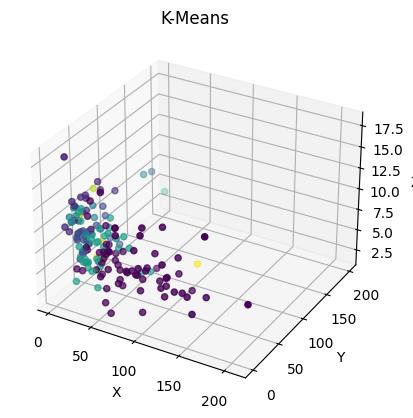

In [18]:
columns_for_clustering = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
points = df[columns_for_clustering].values


plot_data(points, labels=None, title='Datos Socioecnomicos')

#  K-means clustering
print('----- K-means -----')
kmeans = KMeans(n_clusters=10).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Labels: ', clustering_labels)
print('Centers: ', centers)
plot_data(points, clustering_labels, 'K-Means')

# Utiliza al menos dos métodos para estimar el número óptimo de grupos.

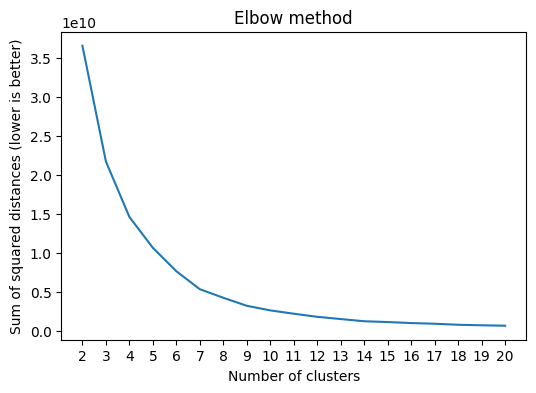

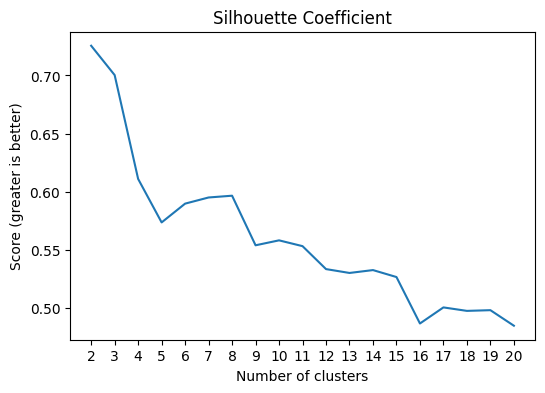

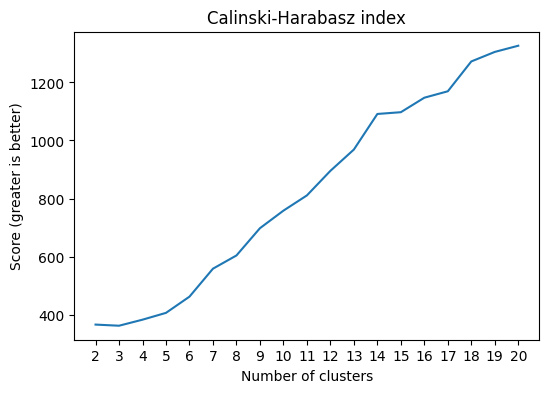

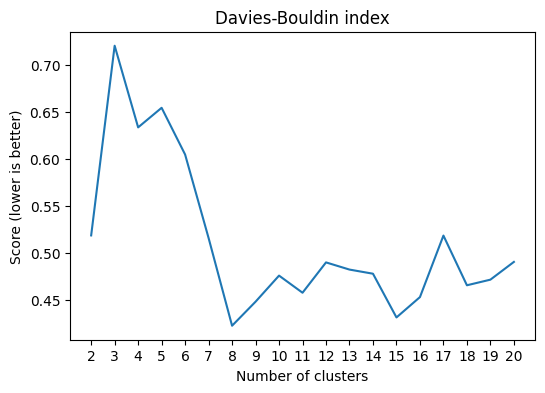

In [26]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init=10).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

# Create individual subplots
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(ks, sum_of_squared_distances)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distances (lower is better)')
ax1.set_title('Elbow method')
ax1.set_xticks(ks)
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
ax2.plot(ks, sscore)
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Score (greater is better)')
ax2.set_title('Silhouette Coefficient')
ax2.set_xticks(ks)
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.plot(ks, chscore)
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel('Score (greater is better)')
ax3.set_title('Calinski-Harabasz index')
ax3.set_xticks(ks)
plt.show()

fig, ax4 = plt.subplots(figsize=(6, 4))
ax4.plot(ks, dbscore)
ax4.set_xlabel('Number of clusters')
ax4.set_ylabel('Score (lower is better)')
ax4.set_title('Davies-Bouldin index')
ax4.set_xticks(ks)
plt.show()





----- K-means -----
Labels:  [0 0 0 0 3 3 0 1 1 0 3 3 0 3 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 3 0 0 0
 0 0 0 0 3 3 3 1 0 0 0 0 3 0 3 0 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 1 0 0 0 0 1
 3 1 0 1 0 3 0 0 1 0 0 3 0 0 0 3 3 2 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1
 3 0 0 2 3 0 0 0 0 0 3 3 2 3 3 0 0 3 0 0 3 0 1 3 3 0 0 3 3 0 0 0 0 1 1 0 0
 0 0 0 0 0 3 0 0 0 1 1 1 3 0 0 3 0 0 0]
Centers:  [[5.41351852e+01 3.32573981e+01 6.32157407e+00 4.55385731e+01
  6.38113889e+03 9.20411111e+00 6.65666667e+01 3.51981481e+00
  3.02725926e+03]
 [5.04285714e+00 5.55285714e+01 9.37380952e+00 4.72095238e+01
  4.75714286e+04 2.76814286e+00 8.04571429e+01 1.77761905e+00
  4.60857143e+04]
 [5.00000000e+00 9.23333333e+01 6.35333333e+00 6.47666667e+01
  9.30000000e+04 5.51666667e+00 8.06000000e+01 1.88333333e+00
  8.77000000e+04]
 [1.21028571e+01 5.22942857e+01 6.84514286e+00 4.93371429e+01
  2.56000000e+04 6.59545714e+00 7.60628571e+01 1.97685714e+00
  1.73477143e+04]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


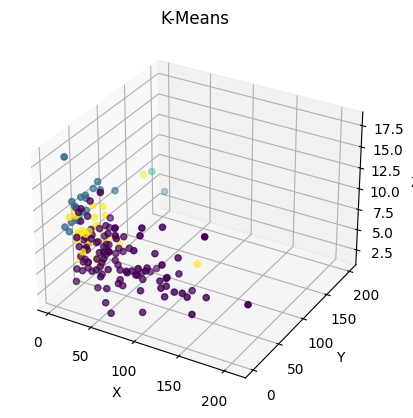

In [27]:
# k means con 4 cluster que fue lo que estimamos ser el número optimo de clusters
print('----- K-means -----')
kmeans = KMeans(n_clusters=4).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('Labels: ', clustering_labels)
print('Centers: ', centers)
plot_data(points, clustering_labels, 'K-Means')

## 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.


Clustering aglomerativo: En esta sección, se realiza el agrupamiento aglomerativo con diferentes parámetros:

En el primer metodo, se hace el agrupamiento aglomerativo con 4 grupos utilizando el método de enlace completo por defecto.

En el segundo, se hace el agrupamiento aglomerativo con 8 grupos utilizando el enlace único y afinidad de Manhattan.

Diferencia: El primer caso crea 4 grupos de datos utilizando el método de enlace completo, lo que significa que los datos se agrupan de manera que cada punto del grupo está más cerca de todos los puntos del grupo que de cualquier punto fuera del grupo. En el segundo caso, se crean 8 grupos utilizando el enlace único, lo que agrupa los datos de manera que cada punto del grupo está más cerca de cualquier punto del grupo que de cualquier punto fuera del grupo, y se utiliza la distancia de Manhattan para medir la similitud entre los datos.

visualización grafica: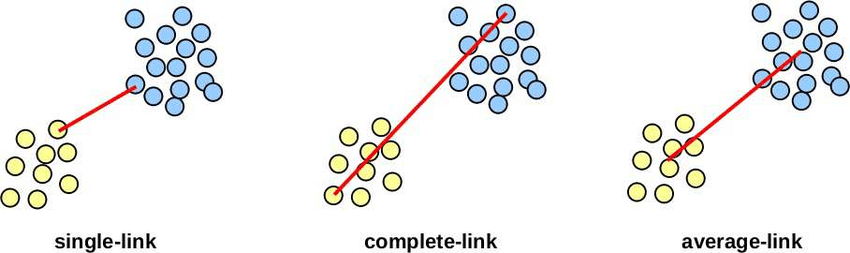

----- Aglomerative clustering -----
Labels:  [2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


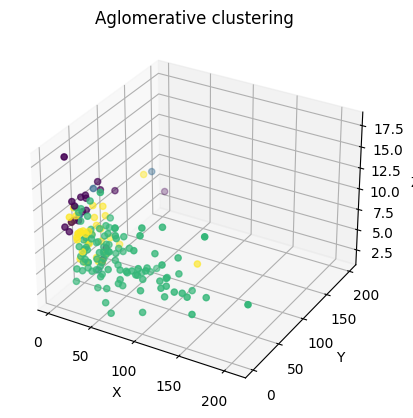

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


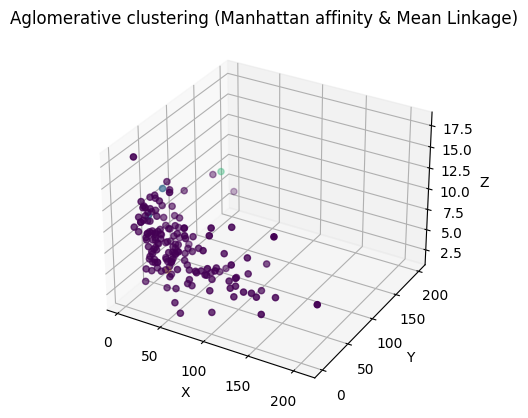

In [30]:
from sklearn.cluster import AgglomerativeClustering

####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(points)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering')

# Aglomerative clustering with single linkage
agl = AgglomerativeClustering(n_clusters=8, linkage = 'single').fit(points)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

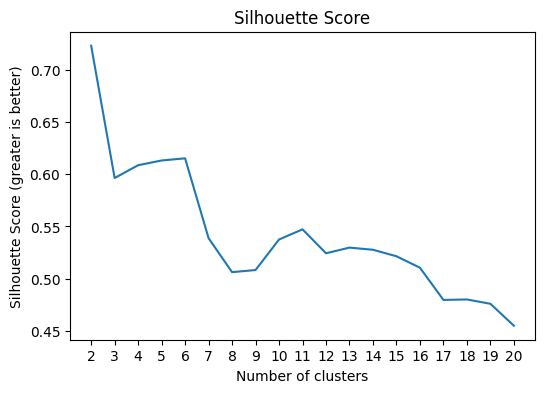

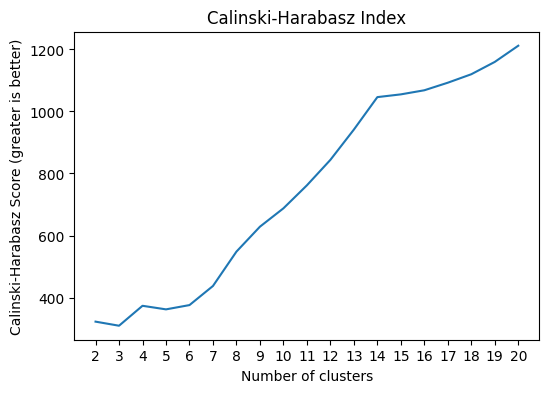

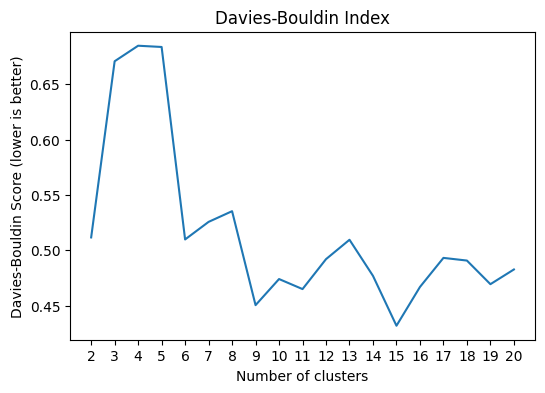

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# Optimal number of clusters
sscore = []
chscore = []
dbscore = []
ks = np.arange(2, 21)

# Loop through different numbers of clusters (k)
for k in ks:
    # Find an AgglomerativeClustering model with k clusters
    agl = AgglomerativeClustering(n_clusters=k).fit(points)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, agl.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, agl.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, agl.labels_))

# Create individual subplots for each evaluation metric
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(ks, sscore)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette Score (greater is better)')
ax1.set_title('Silhouette Score')
ax1.set_xticks(ks)
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
ax2.plot(ks, chscore)
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Calinski-Harabasz Score (greater is better)')
ax2.set_title('Calinski-Harabasz Index')
ax2.set_xticks(ks)
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.plot(ks, dbscore)
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel('Davies-Bouldin Score (lower is better)')
ax3.set_title('Davies-Bouldin Index')
ax3.set_xticks(ks)
plt.show()


también se puede decir que es 4 el numero optimo de clusters entonces no es necesario volver a usar el metodo porque ya se hizo anteriormente con 4.

## 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:


In [32]:
!pip install sklearn-som

In [37]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


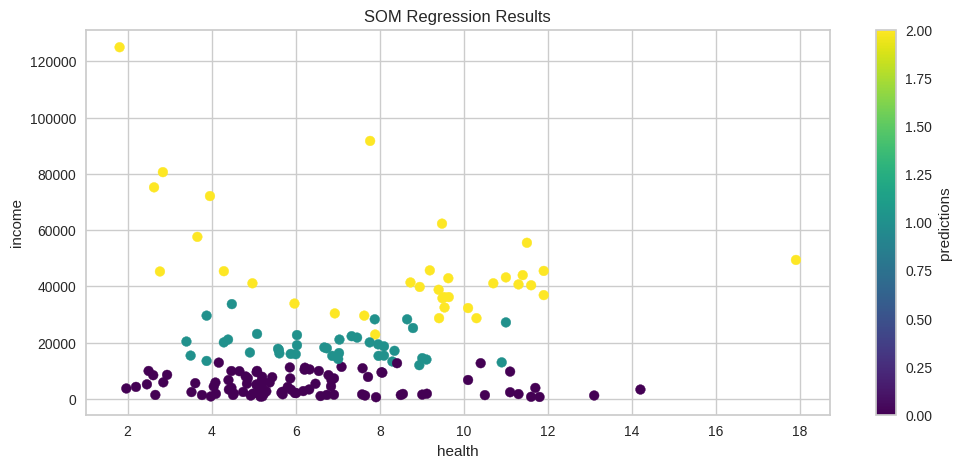

In [63]:
import matplotlib.pyplot as plt
from sklearn_som.som import SOM


#   columns to use for clustering
columns_for_clustering = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_for_som = df[columns_for_clustering].values

# Build a 3x1 SOM (3 clusters)
som = SOM(m=3, n=1, dim=len(columns_for_clustering), random_state=1234)

# Fit it to the data
som.fit(data_for_som)

# Assign each datapoint to its predicted cluster
predictions = som.predict(data_for_som)

# Create scatter plots with continuous color scales

plt.figure(figsize=(12, 5))

x = df['health']
y = df['income']

c = predictions  # Modify with the appropriate column name

plt.scatter(x, y, c=predictions, cmap='viridis', marker='o')
plt.title('SOM Regression Results')
plt.xlabel('health')
plt.ylabel('income')
plt.colorbar(label='predictions')


# Display the plot
plt.show()


Primero, importamos las herramientas que necesitamos para hacer gráficos y para usar un algoritmo especial de agrupamiento llamado SOM.

Luego, hacemos una lista de las cosas que queremos usar para agrupar nuestros datos. En este caso, son las columnas de tu información que se llaman 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' y 'gdpp'.

Después, tomamos esos datos de esas columnas y los ponemos en una bolsa especial llamada data_for_som.

Ahora viene lo interesante: creamos un mapa especial que divide nuestros datos en grupos. Este mapa tiene 3 filas y 1 columna, por lo que va a dividir nuestros datos en 3 grupos. También le decimos al mapa cuántas cosas hay en nuestros datos (en este caso, 9 cosas).

Luego, le decimos al mapa que mire nuestros datos y aprenda cómo agruparlos mejor.

Una vez que el mapa ha aprendido, le preguntamos a qué grupo pertenece cada uno de nuestros datos y guardamos esas respuestas en una lista llamada predictions.

Ahora, creamos una imagen grande para mostrar nuestro gráfico.

Elegimos dos de nuestros datos para ponerlos en el gráfico: 'health' en el eje X y 'income' en el eje Y.

Usamos colores para mostrar a qué grupo pertenece cada dato. Los colores se basan en nuestras predicciones de grupo que guardamos antes.

Agregamos un título y nombres a los ejes del gráfico para que se vea bonito y entendible.

Ponemos una barra de colores en el gráfico para que podamos entender mejor qué significa cada color.

Finalmente, mostramos el gráfico para ver cómo se agrupan nuestros datos de 'health' e 'income' según lo que aprendió el mapa.

# 4. ejercicio extra
# Usamos PCA para ver si podemos visualizar mejor los datos usando KMEANS



In [51]:
# To load the dataset and its visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCAVisualizer



In [ ]:
df3 = df.drop(columns = ['country'], axis=1)
df3

In [86]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df3)
scaled_dataframe = pd.DataFrame(scaled_features, columns=df3.columns)

pca = PCA(n_components=3)
pca.fit(scaled_dataframe)
data_pca = pca.transform(scaled_dataframe)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
#  K-means clustering
print('----- K-means -----')
kmeans = KMeans(n_clusters=3).fit(df_pca)

clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
centroidsDf = pd.DataFrame(centers, columns=df_pca.columns)
centroidsDf

In [95]:
df_pca_copy = df_pca.copy()
df_pca_copy['KMeans_pred'] = clustering_labels
df_pca_copy

,PC1,PC2,PC3,KMeans_pred
0,-2.913025,0.095621,-0.718118,2
1,0.429911,-0.588156,-0.333486,1
2,-0.285225,-0.455174,1.221505,1
3,-2.932423,1.695555,1.525044,2
4,1.033576,0.136659,-0.225721,1
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,1
163,-0.551036,-1.233886,3.101350,1
164,0.498524,1.390744,-0.238526,1
165,-1.887451,-0.109453,1.109752,2


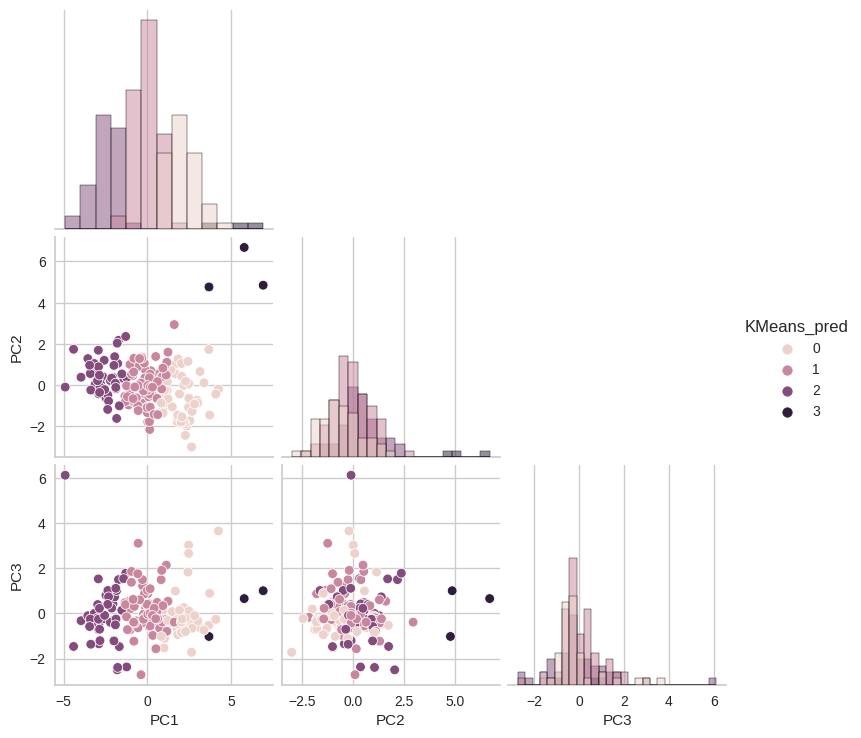

In [96]:
sns.pairplot(df_pca_copy[df_pca_copy.columns], hue='KMeans_pred', corner=True, diag_kind="hist")

In [97]:
labels = df_pca_copy['KMeans_pred']
df['Label'] = labels
df['Label'].unique()

array([2, 1, 0, 3], dtype=int32)

In [98]:
dfL0 = df[df['Label']==0]
dfL1 = df[df['Label']==1]
dfL2 = df[df['Label']==2]

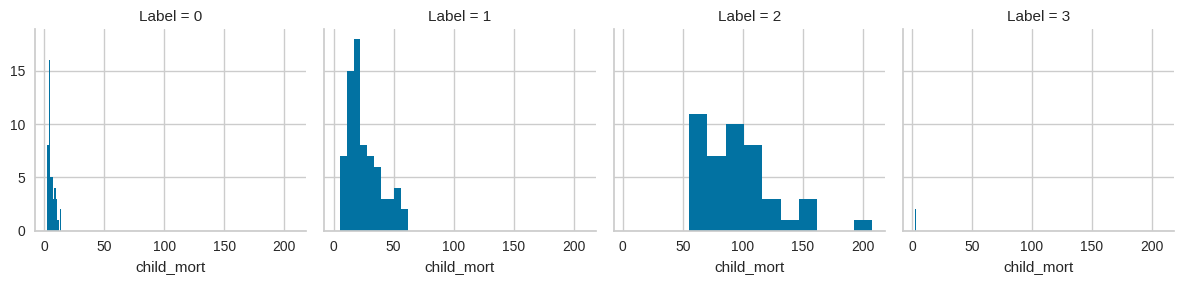

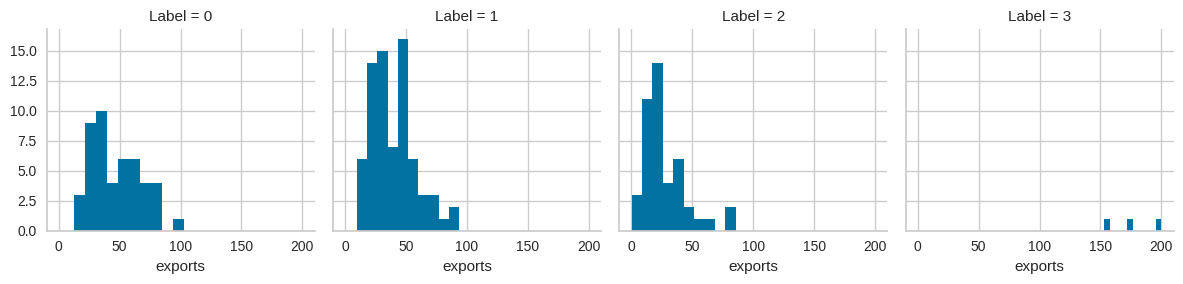

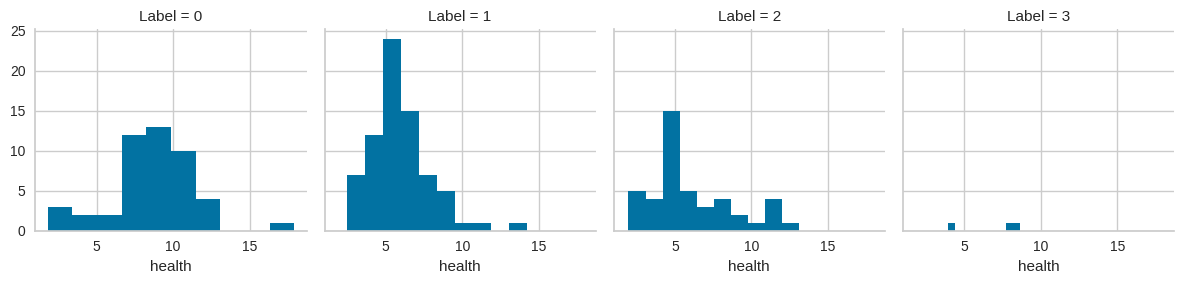

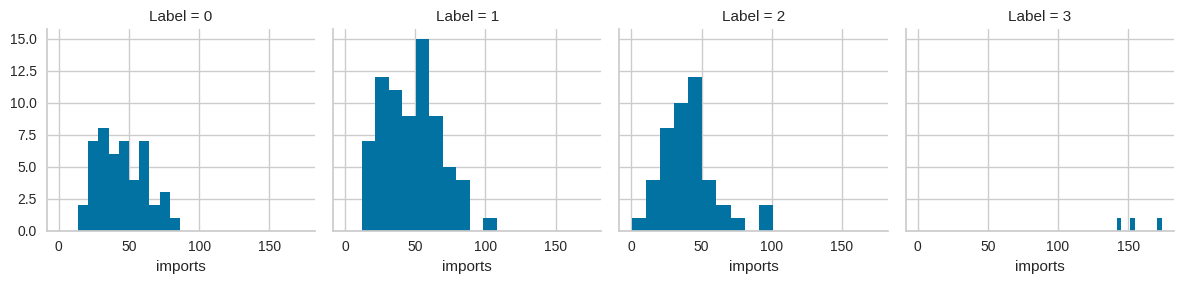

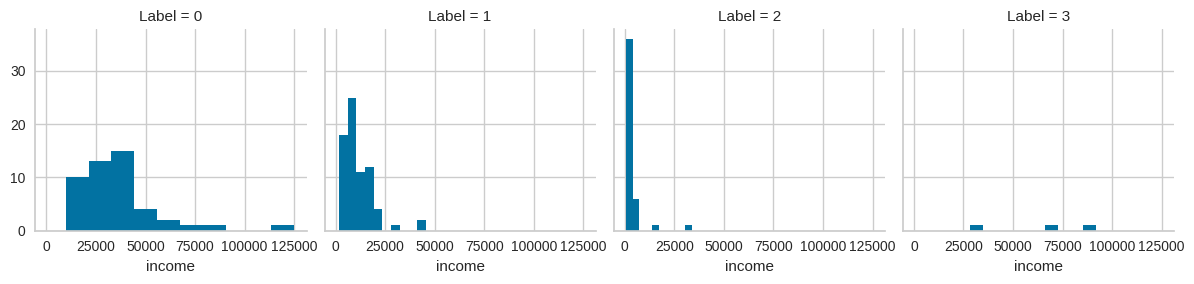

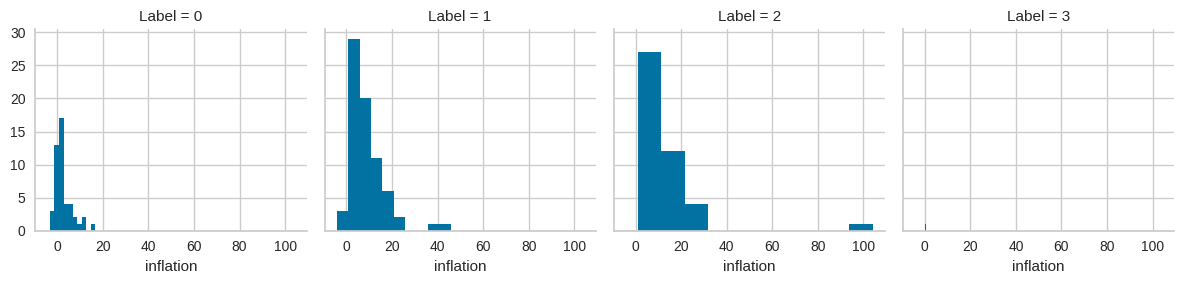

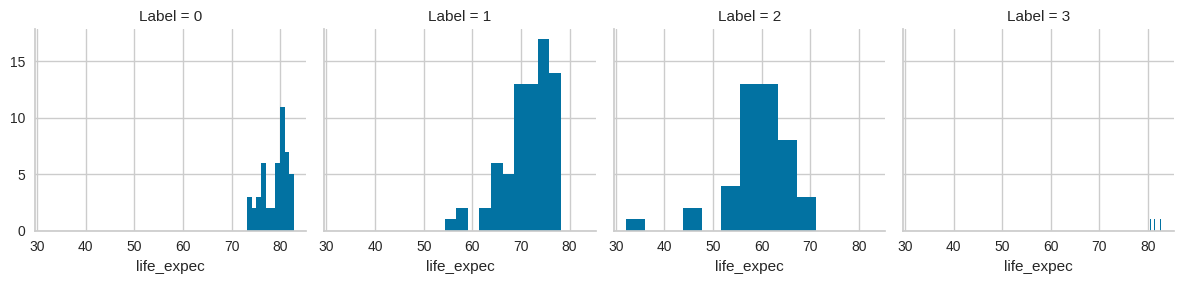

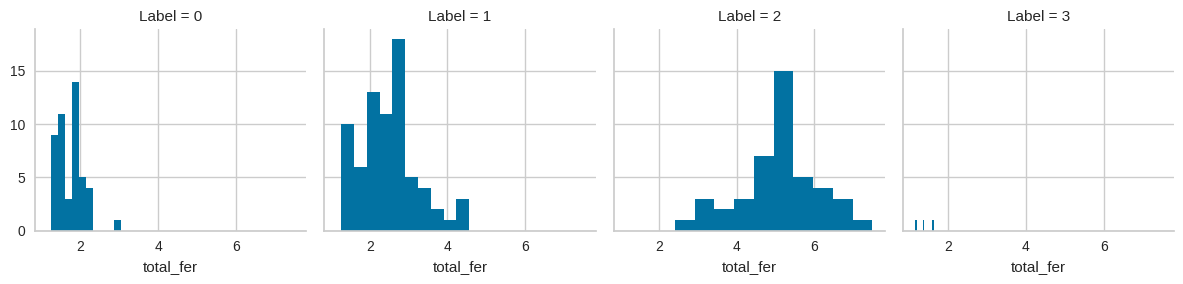

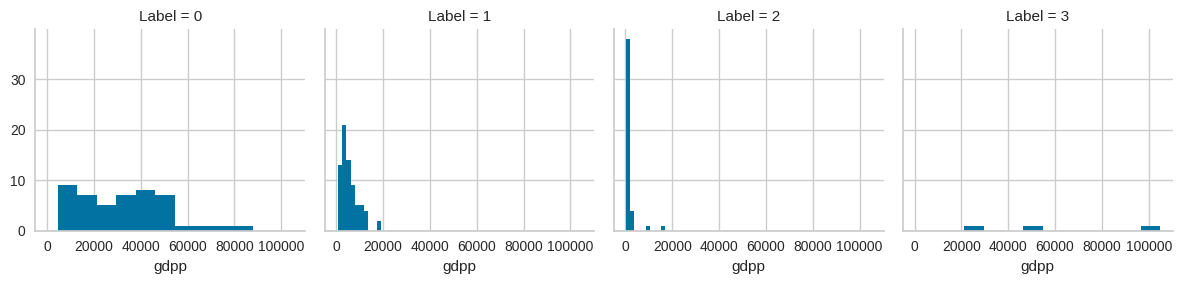

In [99]:
import matplotlib.pyplot as plt
for column in df.drop(columns=['Label', 'country']):
    ax = sns.FacetGrid(df, col='Label')
    ax.map(plt.hist, column)

In [93]:
countries_with_label_2 = df[df['Label'] == 2]['country']
print(countries_with_label_2)

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object


# 5. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.


Al utilizar distintos métodos de agrupamiento para visualizar los datos, noté que se me dificultaba identificar claramente las agrupaciones. Por lo tanto, decidí realizar un ejercicio adicional utilizando el mismo método que habíamos utilizado al principio, es decir, K-means, pero esta vez combinándolo con un análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos. Esto resultó ser una estrategia efectiva, ya que pude mejorar significativamente la visualización y también obtuve un agrupamiento más coherente de los datos.

Inicié reduciendo la dimensionalidad de los datos a 4 componentes principales, pero después de analizar los resultados, encontré que 3 componentes principales funcionaban aún mejor para representar la variabilidad de los datos. Deje una grafica extra en las visualizaciones que sería del Label 3, para mostrar que con 4 componentes no llegas a una mejor distribución y en cambio dejas a un cluster casi vacío.

El análisis de agrupamiento reveló que los países con el Label 2 son los que más necesitan ayuda. Esto se fundamenta en el hecho de que en casi todas las estadísticas, como la mortalidad infantil, gasto en salud, ingresos, etc., estos países presentan los peores indicadores. Al examinar la lista de países dentro de este grupo, se constató que se trataba de naciones en vías de desarrollo que enfrentan desafíos significativos en varios aspectos de su desarrollo. Esta conclusión refuerza la idea de que estos países requieren asistencia y atención prioritaria, dado que sus condiciones son preocupantes en comparación con otros grupos.

En resumen, la combinación de K-means y PCA proporcionó una perspectiva más clara y precisa de la situación de los países, identificando de manera efectiva aquellos que requieren una mayor atención y apoyo debido a sus condiciones socioeconómicas desfavorables.